In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

Saving medical.csv to medical.csv


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Mean Squared Error: 20761771.41
R-squared: 0.86


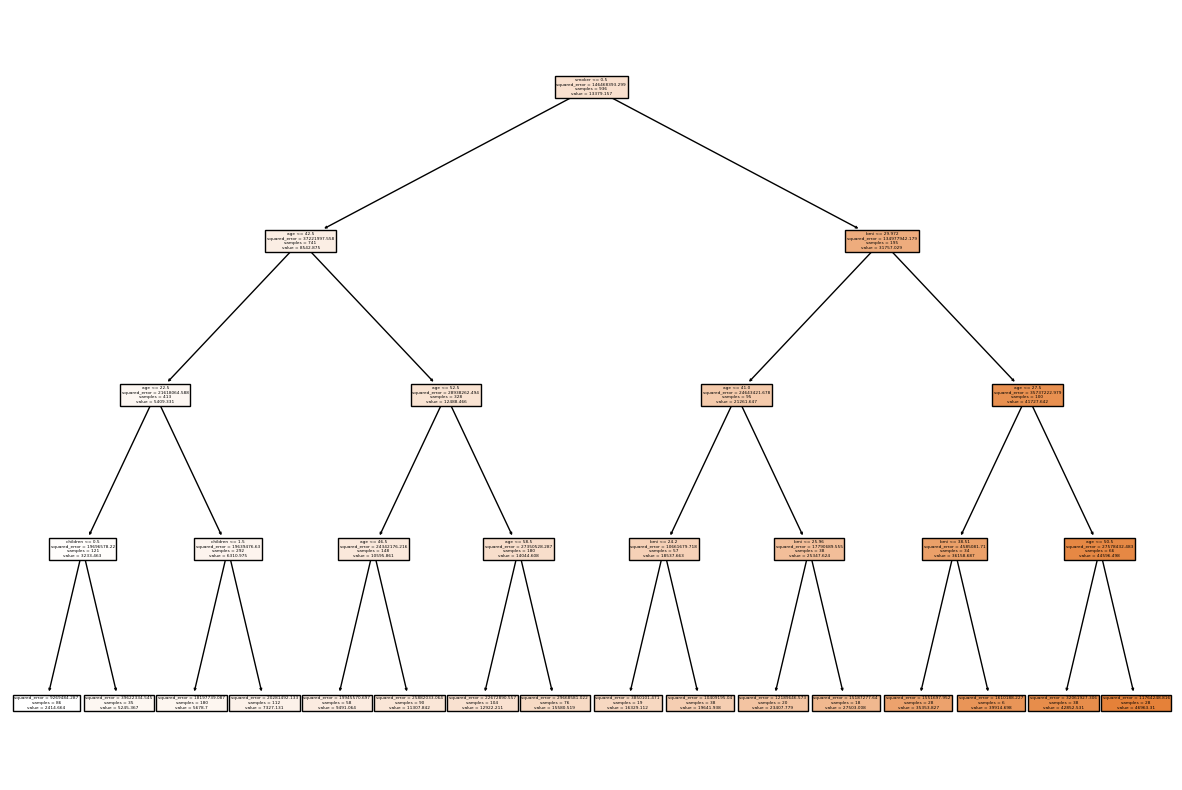

In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree # Use DecisionTreeRegressor for continuous target
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the medical dataset
url = '/content/medical.csv'  # Replace with the actual path to your dataset
medical_data = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
print(medical_data.head())

# Preprocessing
# Fill missing values if any (example shown for 'sex' column)
medical_data['sex'].fillna(medical_data['sex'].mode().iloc[0], inplace=True)

# Convert categorical features to numerical
label_encoders = {}
for column in ['sex', 'smoker', 'region']:  # Replace with your categorical columns

    le = LabelEncoder()
    medical_data[column] = le.fit_transform(medical_data[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = medical_data.drop('charges', axis=1)  # Features
y = medical_data['charges']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree regressor
regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=4, random_state=42) # Changed to DecisionTreeRegressor
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(regressor, feature_names=X.columns, filled=True) # Changed clf to regressor
plt.show()